In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [4]:
df = pd.read_csv('../Genre Prediction/Multi_Label_dataset/train.csv')

In [5]:
# Taking 30 percentage of the dataset for this project as using whole dataset crashes the memory threshold of kaggle kernels
df = df.head(2300)

In [6]:
df.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
width = 350
height = 350
X = []
for i in tqdm(range(df.shape[0])):
  path = '../Genre Prediction/Multi_Label_dataset/Images/'+df['Id'][i]+'.jpg'
  img = image.load_img(path,target_size=(width,height,3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 2300/2300 [00:04<00:00, 481.44it/s]


In [8]:
X.shape

(2300, 350, 350, 3)

In [9]:
y = df.drop(['Id','Genre'],axis=1)
y = y.to_numpy()
y.shape

(2300, 25)

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [11]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 348, 348, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 174, 174, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 174, 174, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 172, 172, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 172, 172, 32)     1

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
65/65 [==============================] - 65s 952ms/step - loss: 0.7603 - accuracy: 0.1005 - val_loss: 3.9567 - val_accuracy: 0.0000e+00
Epoch 2/5
65/65 [==============================] - 59s 906ms/step - loss: 0.5276 - accuracy: 0.1855 - val_loss: 2.8762 - val_accuracy: 0.0000e+00
Epoch 3/5
65/65 [==============================] - 60s 920ms/step - loss: 0.3199 - accuracy: 0.3179 - val_loss: 2.4654 - val_accuracy: 0.0130
Epoch 4/5
65/65 [==============================] - 59s 915ms/step - loss: 0.2470 - accuracy: 0.3382 - val_loss: 0.9078 - val_accuracy: 0.1435
Epoch 5/5
65/65 [==============================] - 59s 914ms/step - loss: 0.2150 - accuracy: 0.3899 - val_loss: 0.2938 - val_accuracy: 0.1609


In [16]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

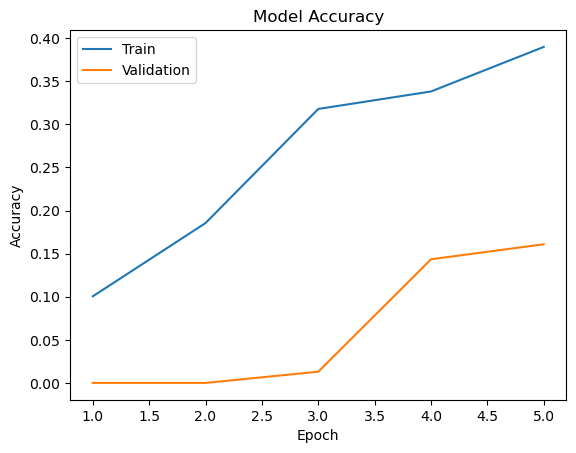

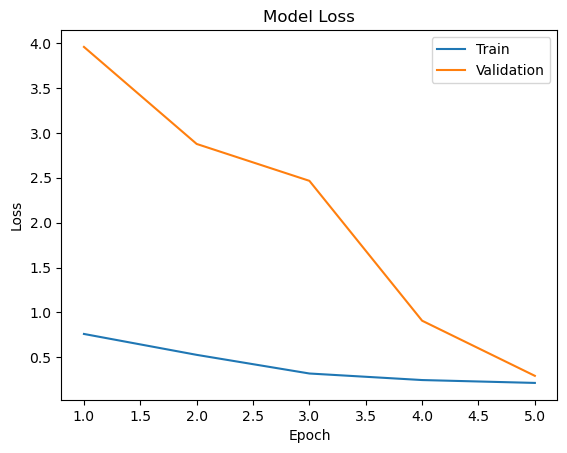

In [17]:
plotLearningCurve(history,5)

1/1 [==============================] - 0s 19ms/step
Drama
Adventure
Action


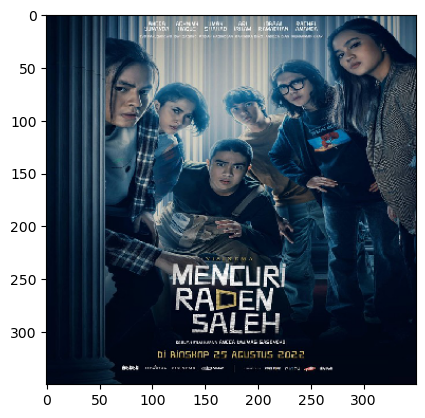

In [20]:
img = image.load_img('radensaleh.jpg',target_size=(width,height,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,width,height,3)
classes = df.columns[2:]
y_pred = model.predict(img)
top3=np.argsort(y_pred[0])[:-4:-1]
for i in range(3):
  print(classes[top3[i]])